In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [4]:
ab = pd.read_csv('ab_data.csv')
ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


#### To calculate the number of unique values, use .nunique()

In [6]:
ab['user_id'].nunique(), ab.shape[0]

(290584, 294478)

#### to count the number of null values in each column use sum

In [10]:
ab.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

#### checking if there is a mismatch

In [16]:
ab_new1 = ab[(ab.group == 'control') & (ab.landing_page == 'new_page')]
ab_new2 = ab[(ab.group == 'treatment')&(ab.landing_page == 'old_page')]

In [17]:
ab_new1.shape[0], ab_new2.shape[0], ab_new1.shape[0] + ab_new2.shape[0]

(1928, 1965, 3893)

#### We will only consider rows where group and landing page combination is coherent 

In [18]:
ab_new1 = ab[(ab.group == 'control') & (ab.landing_page == 'old_page')]
ab_new2 = ab[(ab.group == 'treatment')&(ab.landing_page == 'new_page')]

In [27]:
ab2 = pd.concat([ab_new1, ab_new2])

#### not adding drop = True inside reset_index() will make the original index as a column

In [28]:
ab2.reset_index(drop = True)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0
5,644214,2017-01-22 02:05:21.719434,control,old_page,1
6,847721,2017-01-17 14:01:00.090575,control,old_page,0
7,650559,2017-01-24 11:55:51.084801,control,old_page,0
8,935734,2017-01-17 20:33:37.428378,control,old_page,0
9,746742,2017-01-23 11:38:29.592148,control,old_page,0


In [29]:
ab2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [33]:
ab2.shape[0]

290585

In [34]:
ab2['user_id'].nunique()

290584

In [35]:
ab2.drop_duplicates(subset=['user_id'], keep = 'first', inplace = True)

In [36]:
ab2.shape[0]

290584

#### conversion rate of control group

In [37]:
ab2[ab2['group']=='control']['converted'].mean()

0.1203863045004612

#### conversion rate of treatment group

In [38]:
ab2[ab2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

#### treatment group seems to have a lower conversion rate

### Now we can perform A/B tests

H(0) is that p_old = p_new
H(1) is that p_new < p_old

In [50]:
#In this section I am assuming that the new and old conversion rates are the same
pnew = ab2.converted.mean()
pold = ab2.converted.mean()
pnew, pold

(0.11959708724499628, 0.11959708724499628)

In [45]:
nold = ab2[ab2['group'] == 'control'].shape[0]
nnew = ab2[ab2['group'] == 'treatment'].shape[0]

In [46]:
nold, nnew

(145274, 145310)

In [54]:
new_page_converted = np.random.binomial(1, pnew, nnew)
old_page_converted = np.random.binomial(1, pold, nold)

In [55]:
npc = new_page_converted.mean()
opc = old_page_converted.mean()

In [56]:
npc, opc

(0.11882182919276031, 0.11922986907498934)

In [59]:
diff = opc-npc

In [60]:
diff

0.0004080398822290249

### The next step is repeating the experiment for 10000 times. 

In [62]:
diff_list = []
for i in range(10000):
    new_page_converted = np.random.binomial(1, pnew, nnew)
    old_page_converted = np.random.binomial(1, pold, nold)
    npc = new_page_converted.mean()
    opc = old_page_converted.mean()
    diff_list.append(opc-npc)

(array([  13.,  116.,  539., 1545., 2554., 2760., 1656.,  668.,  128.,
          21.]),
 array([-4.42355328e-03, -3.54668593e-03, -2.66981859e-03, -1.79295124e-03,
        -9.16083891e-04, -3.92165428e-05,  8.37650805e-04,  1.71451815e-03,
         2.59138550e-03,  3.46825285e-03,  4.34512020e-03]),
 <a list of 10 Patch objects>)

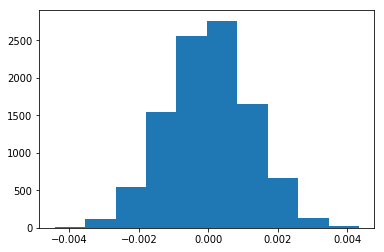

In [63]:
plt.hist(diff_list)

In [65]:
sum(diff_list)/len(diff_list)

2.2255106219102967e-05

##### Mean is close to zero

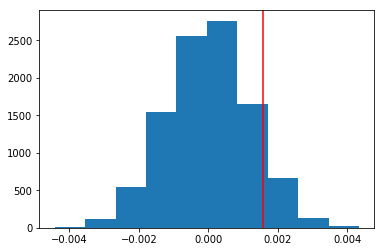

In [102]:
plt.hist(diff_list)
plt.axvline(x = ab2[ab2['group']=='control'].converted.mean()-ab2[ab2['group']=='treatment'].converted.mean(), color = 'red')

points -1.96 and 1.96 lie at the end of 95% confidence interval around 0. The point represented by the red line lies in between this confidence interval. Hence we cannot reject the null hypothesis

## Using Logistic regression for the same purpose
#### Logistic regression's results are interpretable

##### creating dummy variables
https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

In [69]:
dummy = pd.get_dummies(ab2['group'])
dummy.tail()

,control,treatment
294462,0,1
294465,0,1
294468,0,1
294472,0,1
294477,0,1


In [73]:
ab3 = pd.concat([ab2, dummy], axis = 1)
ab3['intercept'] = 1
ab3['ab_page'] = ab3['group'].apply(lambda x: 1 if x == 'treatment' else 0)
ab3.head()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1,0


In [74]:
ab3.tail()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0,0,1,1,1
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0,0,1,1,1
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0,0,1,1,1
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0,0,1,1,1
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,0,1,1,1


In [72]:
import statsmodels.api as sm

In [75]:
logit  = sm.Logit(ab3['converted'], ab3[['intercept', 'ab_page']])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [76]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 11 Jun 2020   Pseudo R-squ.:               8.077e-06
Time:                        20:59:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [77]:
ls

 Volume in drive C is OS
 Volume Serial Number is 6C9F-A109

 Directory of C:\Users\Saurabh Vaichal\Desktop\Full time resources\ABTestingExample

06/11/2020  09:00 PM    <DIR>          .
06/11/2020  09:00 PM    <DIR>          ..
06/11/2020  08:39 PM    <DIR>          .ipynb_checkpoints
06/11/2020  05:05 PM        15,901,933 ab_data.csv
06/11/2020  09:00 PM            67,046 ABtesting_eCommerceWebsite.ipynb
06/11/2020  07:38 PM         4,502,943 Analyze_ab_test_results_notebook.html
06/11/2020  05:08 PM            99,915 Analyze_ab_test_results_notebook.ipynb
06/11/2020  05:06 PM         2,905,856 countries.csv
06/11/2020  05:53 PM           316,290 F-1-OPT-Employment-Reporting-Form.pdf
               6 File(s)     23,793,983 bytes
               3 Dir(s)   7,087,935,488 bytes free


In [78]:
dfc = pd.read_csv('countries.csv')

In [79]:
dfc.columns

Index(['user_id', 'country'], dtype='object')

In [80]:
ab3.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted', 'control',
       'treatment', 'intercept', 'ab_page'],
      dtype='object')

In [82]:
ab4 = pd.merge(ab3, dfc, how = 'inner', on = 'user_id')

In [83]:
ab4.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted', 'control',
       'treatment', 'intercept', 'ab_page', 'country'],
      dtype='object')

In [84]:
ab4.head()

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1,0,US
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,1,0,US


In [93]:
ab4['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [95]:
pd.DataFrame(ab4.groupby('country')['user_id'].count())
#ab4.groupby('country')['user_id'].count()

,user_id
country,
CA,14499
UK,72466
US,203619


In [97]:
ab4['country'].isnull().sum()

0

In [98]:
ab4['ab_country'] = ab4['country'].apply(lambda x: 1 if x == 'US' else (0 if x == 'UK' else -1))

In [99]:
ab4.head(4)

,user_id,timestamp,group,landing_page,converted,control,treatment,intercept,ab_page,country,ab_country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,1
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1,0,US,1


In [100]:
logit2  = sm.Logit(ab4['converted'], ab4[['intercept', 'ab_page', 'ab_country']])
result2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [101]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 11 Jun 2020   Pseudo R-squ.:               9.341e-06
Time:                        21:11:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3702
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.010   -192.041      0.000      -2.012      -1.972
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
ab_country     0.0052      0.010      0.518      0.604      -0.014       0.025
==============================================================================
"""

#### Reference:
https://github.com/hwangmpaula/Analyze-A-B-Test-Results/blob/hwangmpaula-patch-1/Analyze_ab_test_results_notebook.ipynb